<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/katex@0.12.0/dist/katex.min.css" integrity="sha384-AfEj0r4/OFrOo5t7NnNe46zW/tFgW6x/bCJG8FqQCEo3+Aro6EYUG4+cU+KJWu/X" crossorigin="anonymous">
<script defer src="https://cdn.jsdelivr.net/npm/katex@0.12.0/dist/katex.min.js" integrity="sha384-g7c+Jr9ZivxKLnZTDUhnkOnsh30B4H0rpLUpJ4jAIKs4fnJI+sEnkvrMWph2EDg4" crossorigin="anonymous"></script>

# 1. Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from prml.feature.polynomial import PolynomialFeature
from prml.linear.linear_regression import LinearRegression

## 1.1. Example: Polynomial Curve Fitting

For presentation purposes, consider a synthetically generated example dataset. The data were
generated from the function $\sin(2\pi x)$ by adding random Gaussian noise having standard
deviation $0.3$.

We generated $N{=}10$ observations spaced uniformly in range $[0,1]$. These observations
comprise the input data vector:

<span id="mykatex1"></span>
<script>
katex.render("\mathsf{x} = (x_1,\dots,x_N)^T", mykatex1);
</script>

$
\large
\mathsf{x} = (x_1,\dots,x_N)^T
$

For each generated observation $x$ we obtained its corresponding value of the function
$\sin(2\pi x)$ and then adding the random noise to capture the real-life situation of missing
information.

$
\large
\mathsf{t} = (t_1,\dots,t_N)^T
$

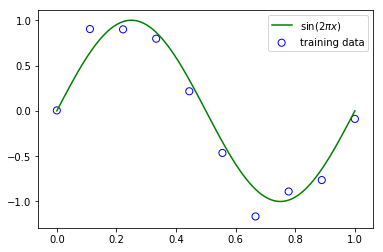

In [2]:
def create_toy_data(f, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = f(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def sin(x):
    return np.sin(2 * np.pi * x)

# Generate a train set
x_train, y_train = create_toy_data(sin, 10, 0.25)

# Generate a test set
x_test = np.linspace(0, 1, 100)
y_test = sin(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

The generated training dataset of $N{=}10$ points is shown as blue circles, each comprising an
observation of the input variable $x$ along with the corresponding target variable $t$. The
green curve shows the function $\sin(2\pi x)$ used to generate the data.

### Polynomial Linear Model

Our goal here is to predict the value of $\hat{t}$ for some new value of $\hat{x}$, without any
knowledge of the green curve. To that end, we consider a simple approach based on curve fitting.
In particular, we shall fit the data using a polynomial function of the form:

$
\large
y(x, \mathbf{w}) = w_0 + w_1x + w_2x^2 + \dots + w_Mx^M = \sum_{j=0}^M w_jx^j
$

where $M$ is the *order* of the polynomial.

**Note**: Functions, such as the function $y(x, \mathbf{w})$, that are linear functions of the
unknown parameters or coefficients $\mathbf{w}$, are called *linear models*.

### Error Function

Next, we need to determine the values of the coefficients $\mathbf{w}$ by fitting the polynomial
to the training data. This can be done by minimizing an *error function* that measures the
misfit between the function $y(x,\mathbf{w})$, for a given value of $\mathbf{w}$, and the
training data points.

One simple error function is the sum of squares of the errors between $y(x,\mathbf{w})$ and
the corresponding target values $t_n$:

$
\large
E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N (y(x,\mathbf{w}) - t_n)^2 \geq 0
$

where the function becomes zero if, and only if, the function $y(x,\mathbf{w})$ were to pass
exactly through each training data point.

We can solve the curve fitting problem by choosing the value of $\mathbf{w}$ for which
$E(\mathbf{w})$ is as small as possible. Because the error function is quadratic, its
derivatives are linear, and so the minimization of the function has a unique closed from
solution, denoted by $\mathbf{w}^*$. To minimize the error function we should derive the
gradient vector, set it equal to zero and solve for $\mathbf{w}^*$:

$
\large
\nabla E(\mathbf{w}^*) = \mathbf{0}
$

First, we have to substitute the polynomial into the error function:

$
\large
E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N (\sum_{j=0}^M w_jx_n^j - t_n)^2
$

Note that each of the $N$ data points from the generated training set has $1$ dimension, that is
$x \in \mathbb{R}$. However, the polynomial function populates $M$ features for each input $x$,
essentially transforming $x$ into a $M$-dimensional vector. Thus, the training set $\mathsf{x}$
can be written as a $N\times M$ matrix $\mathbf{X}$ where $\mathbf{X}_{nj}$ represents $x_n^j$,
that is, the $n$th input value raised in the power of $j$.

To find the gradient vector, we take the partial derivative of $E$ with respect to an arbitrary
$w_k$. Differentiating the sum, term by term, we get

$
\large
\begin{align*}
\nabla E(\mathbf{w}^*)_k &= \frac{\partial}{\partial w_k} (\mathbf{w}) \\
&= \frac{1}{2}\sum_{n=1}^N 2 (\sum_{j=0}^M w_jx_n^j - t_n)x_n^k
= \sum_{n=1}^N (\sum_{j=0}^M w_jx_n^j - t_n)x_n^k \\
&= \sum_{n=1}^N (\mathbf{X}\mathbf{w} - \mathsf{t})_n\mathbf{X}_{nk}
= \sum_{n=1}^N \mathbf{X}_{kn}^T(\mathbf{X}\mathbf{w} - \mathsf{t})_n \\
&= \big(\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathsf{t})\big)_k
\end{align*}
$

Using the partial derivative for one component, we compute the gradient vector by dropping the
$k$ subscript. Thus, the minimizer $\mathbf{w}^*$ must satisfy:

$
\large
\begin{equation*}
\nabla E(\mathbf{w}^*) = \mathbf{X}^T(\mathbf{X}\mathbf{w}^* - \mathsf{t}) = \mathbf{0}
\end{equation*}
$

Solving for $\mathbf{w}^*$ gives the unique solution of the curve fitting problem:

$
\large
\mathbf{X}^T(\mathbf{X}\mathbf{w}^* - \mathsf{t}) = \mathbf{0} \Leftrightarrow
\mathbf{X}^T\mathbf{X}\mathbf{w}^* = \mathbf{X}^T\mathsf{t} \Leftrightarrow
\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathsf{t}
$

The resulting polynomial is given by the function $y(x, \mathbf{w}^*)$.

### Model Selection

There remains the problem of choosing the order $M$ of the polynomial, which is
an example of the important concept called *model selection* or *model comparison*.

In order to study the effect of different $M$ values, we plot the result of fitting polynomials
having orders $M{=}0,1,3,9$ to the data set.

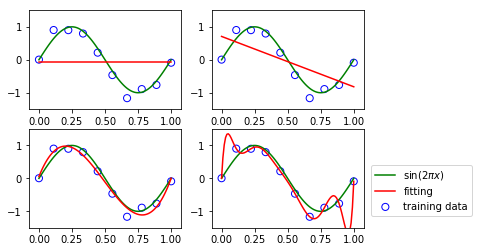

In [3]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

Note that the constant ($M{=}0$) and first order ($M{=}1$) polynomials give rather poor fits to
the data. The third order ($M{=}3$) polynomial seems to give the best fit, while the higher
order one ($M{=}9$) achieves an excellent fit to the data ($E(\mathbf{w}^*){=}\mathbf{0}$).
However, the fitted curve gives a poor representation of the underlying function $\sin(2\pi x)$.
This phenomenon is known as *over-fitting*.

A more quantitative insight into the generalization performance on $M$ can be obtained by using the
root-mean-square (RMS) error defined as:

$
\large
E_{RMS} = \sqrt{2\frac{E(\mathbf{w}^*)}{N}}
$

The RMS error on both training and test data points for each value of $M$ is shown in the following figure:

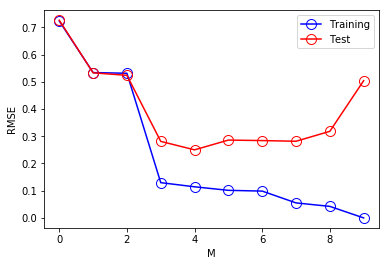

In [6]:
def rms_error(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rms_error(model.predict(X_train), y_train))
    test_errors.append(rms_error(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("M")
plt.ylabel("RMSE")
plt.show()

The test set error is measuring how well we are doing in predicting the values of $t$ for new data observations
of $x$. For $M{=}9$, the training set error goes to zero, because the polynomial contains $10$ degrees of freedom
and so it can be tuned exactly to the $10$ data points in the training set.

It is also interesting to examine the behavior of the model as the size of the data increases. The following figure
depicts the result of fitting the $M{=}9$ polynomial for $N{=}15$ and $N{=}100$ data points.

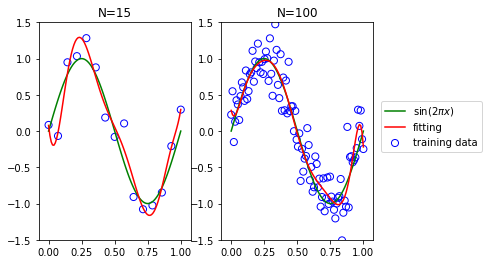

In [17]:
for i, size in enumerate([15, 100]):
    plt.subplot(1, 2, i + 1)

    # Generate a train set
    x_train, y_train = create_toy_data(sin, size, 0.25)

    # Generate a test set
    x_test = np.linspace(0, 1, 100)
    y_test = sin(x_test)

    feature = PolynomialFeature(9)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.title("N={}".format(size))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


Note that the over-fitting problem becomes less severe as the size of the data set increases. In other words,
the larger the data set, the more complex the model that we can afford to fit to the data.

### Regularization

One technique that is often used to control the over-fitting phenomenon is that of *regularization*, which adds a
penalty term to the error function in order to discourage the coefficients from reaching large values. The
simplest such penalty term is the sum of squares of all of the coefficients, leading to the modified error
function of the form:

$
\large
\tilde{E}(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N (y(x,\mathbf{w}) - t_n)^2 + \lambda\|\mathbf{w}\|^2
$

Such techniques are known as *shrinkage* methods because they reduce the value of the coefficients. The particular
case of a quadratic regularizer is called *ridge regression*.

Again, ridge error function can be minimized exactly in closed form as follows:

$
\large
\begin{align*}
\nabla E(\mathbf{w}^*)_k &= \frac{\partial}{\partial w_k} (\mathbf{w}) \\
&= \frac{1}{2}\sum_{n=1}^N 2 (\sum_{j=0}^M w_jx_n^j - t_n)x_n^k + \frac{1}{2}\lambda 2w_k \\
&= \sum_{n=1}^N (\sum_{j=0}^M w_jx_n^j - t_n)x_n^k + \lambda w_k \\
&= \sum_{n=1}^N (\mathbf{X}\mathbf{w} - \mathsf{t})_n\mathbf{X}_{nk} + \lambda w_k
= \sum_{n=1}^N \mathbf{X}_{kn}^T(\mathbf{X}\mathbf{w} - \mathsf{t})_n + \lambda w_k \\
&= \big(\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathsf{t})\big)_k + \lambda w_k
\end{align*}
$

Using the partial derivative for one component, we compute the gradient vector by dropping the
$k$ subscript. Thus, the minimizer $\mathbf{w}^*$ must satisfy:

$
\large
\begin{equation*}
\nabla E(\mathbf{w}^*) =
\mathbf{X}^T(\mathbf{X}\mathbf{w}^* - \mathsf{t}) + \lambda\mathbf{w}^*\mathbf{I}= \mathbf{0}
\end{equation*}
$

Solving for $\mathbf{w}^*$ gives the unique solution that minimizes the ridge error:

$
\large
\begin{align*}
& \mathbf{X}^T(\mathbf{X}\mathbf{w}^* - \mathsf{t}) + \lambda\mathbf{w}^*\mathbf{I} = \mathbf{0} \Leftrightarrow
\mathbf{X}^T\mathbf{X}\mathbf{w}^* - \mathbf{X}^T\mathsf{t} + \lambda\mathbf{w}^*\mathbf{I} = \mathbf{0} \Leftrightarrow \\
& \mathbf{X}^T\mathbf{X}\mathbf{w}^* + \lambda\mathbf{w}^*\mathbf{I} = \mathbf{X}^T\mathsf{t} \Leftrightarrow
\mathbf{w}^*(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}) = \mathbf{X}^T\mathsf{t} \\
& \mathbf{w}^* = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathsf{t}
\end{align*}
$